# Programming Assignment 1
## Wil Gaboury

In [11]:
# imports
import a_star
import local_search as ls
import pandas as pd
import plotnine as p9
import time
import tsp

## Part 1: Exploring Search Algorithm

### 1. Randomly create a family of 30 TSP graphs/matrices for each size 5, 10, 15, 20, ...

In [12]:
def gen_graphs(n):
    result = []
    for i in range(30):
        result.append(tsp.TSPGraph.generate_random(n))
    return result

families = [
#     (2, gen_graphs(2)),
#     (3, gen_graphs(3)),
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
#     (9, gen_graphs(9)),
#     (10, gen_graphs(10)),
#     (11, gen_graphs(11)),
#     (12, gen_graphs(12))
]

### 1. Run the above algorithms on each of the family of size 5, of size 10, etc....
### 2. For each family of 30 graphs/matrices you’ll compute the AVERAGE/MIN/MAX of totalcost, number of nodes, CPU and real-world runtime

In [13]:
def test_a_star(families, hs):
    df = pd.DataFrame(columns=['n', 'h', 'total_cost', 'node_count', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for h_name, h_func in hs.items():
            for i, graph in enumerate(family):    
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = a_star.a_star(graph.get_start_state_node(), tsp.is_goal, h_func)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()

                path = search_result[0]
                
                df = df.append({
                    'n': graph_size,
                    'h': h_name,
                    'test_num': i,
                    'total_cost': search_result[0].cost(),
                    'node_count': search_result[1], 
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64', 'node_count': 'int64'})
    return df

In [14]:
hs = {
    'uniform_cost': a_star.h_uniform_cost,
    'random_edge': a_star.h_random_edge,
    'smallest_edge': a_star.h_smallest_edge
}
df = test_a_star(families, hs)

df_summary = df.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost             node_count             cpu_time  \
                       mean  min  max         mean  min   max      mean   
n h                                                                       
4 random_edge    148.533333   42  250    14.933333    6    29  0.000223   
  smallest_edge  138.233333   42  267    19.766667   10    28  0.000339   
  uniform_cost   134.333333   42  246    19.833333    9    30  0.000281   
5 random_edge    145.500000   52  258    18.600000    6    57  0.000362   
  smallest_edge  137.900000   52  258    51.100000   18    90  0.001139   
  uniform_cost   133.766667   52  253    60.400000   26   126  0.000759   
6 random_edge    186.766667  110  309    29.000000    7   125  0.000654   
  smallest_edge  167.500000   64  309   165.666667   56   361  0.004823   
  uniform_cost   159.766667   64  309   227.366667   61   697  0.004955   
7 random_edge    209.566667  113  310    28.500000    8   126  0.000788   
  smallest_edge  179.366667   97  306   399.366667   94   873  0.016427   
  uniform_cost   173.566667   97  281   728.866667  189  1771  0.014993   
8 random_edge    205.533333  121  288    42.400000   11    91  0.001329   
  smallest_edge  162.333333   72  263  1089.333333  135  3427  0.062029   
  uniform_cost   155.800000   72  263  1870.200000  189  5222  0.048661   

                                    real_time                      
                      min       max      mean       min       max  
n h                                                                
4 random_edge    0.000108  0.000397  0.000222  0.000107  0.000396  
  smallest_edge  0.000198  0.000515  0.000338  0.000197  0.000514  
  uniform_cost   0.000107  0.000501  0.000280  0.000106  0.000495  
5 random_edge    0.000134  0.000997  0.000362  0.000133  0.000996  
  smallest_edge  0.000507  0.001782  0.001139  0.000510  0.001786  
  uniform_cost   0.000343  0.001505  0.000759  0.000342  0.001512  
6 random_edge    0.000188  0.002514  0.000654  0.000187  0.002518  
  smallest_edge  0.001807  0.009510  0.004829  0.001806  0.009528  
  uniform_cost   0.000950  0.057254  0.004961  0.000955  0.057336  
7 random_edge    0.000267  0.003151  0.000790  0.000266  0.003155  
  smallest_edge  0.004203  0.031750  0.016472  0.004207  0.031834  
  uniform_cost   0.003426  0.073482  0.015026  0.003430  0.073701  
8 random_edge    0.000419  0.002750  0.001329  0.000418  0.002754  
  smallest_edge  0.009505  0.227300  0.062165  0.009519  0.227720  
  uniform_cost   0.003898  0.130883  0.048813  0.003954  0.131305

In [15]:
df_plot = df.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'h']).agg('mean')

# fixing the nested columns
df_plot.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

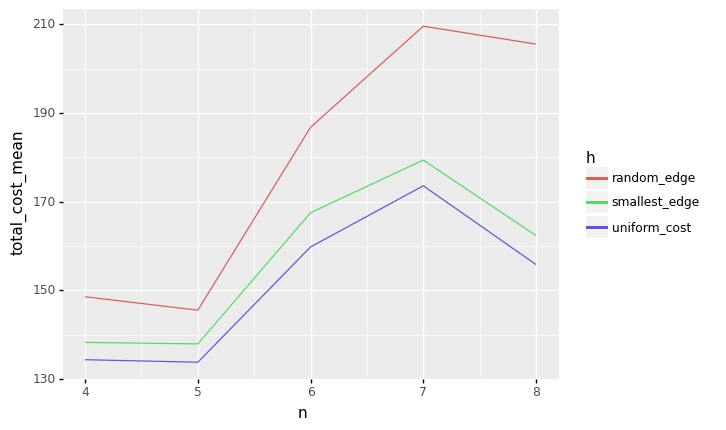

<ggplot: (8768704726245)>

In [16]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line()
)

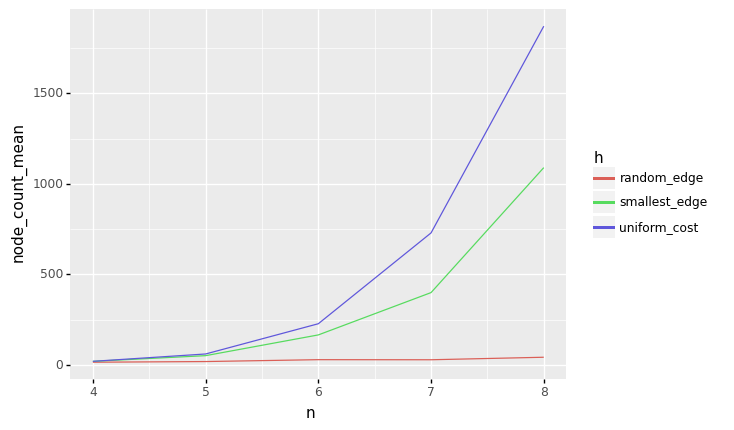

<ggplot: (8768704522623)>

In [17]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

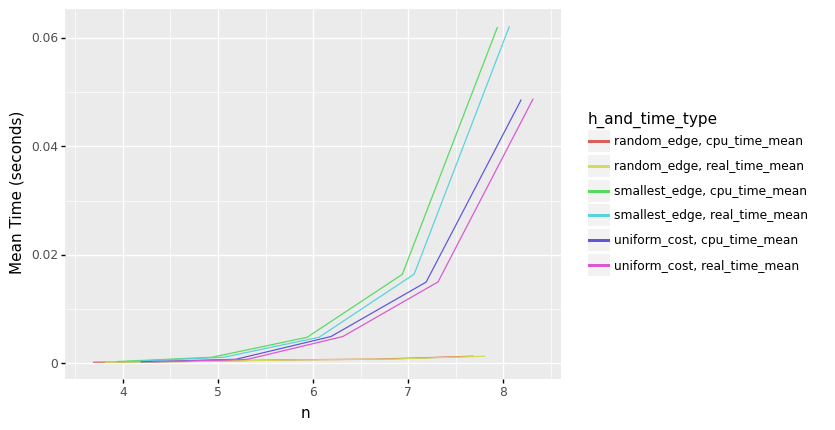

<ggplot: (8768704828239)>

In [18]:
df_time = df_plot.copy()
df_time = df_time[['n', 'h', 'cpu_time_mean', 'real_time_mean']]
df_time = pd.melt(df_time, id_vars=['n', 'h'], value_vars=['cpu_time_mean', 'real_time_mean'], 
        var_name='time_type', value_name='time_mean')
df_time['h_and_time_type'] = df_time['h'].str.cat(df_time['time_type'], sep=', ')
(
    p9.ggplot(df_time, p9.aes(x='n', y='time_mean', color='h_and_time_type'))
        + p9.geom_line(position=p9.position_dodge2(width=0.75))
        + p9.labs(y='Mean Time (seconds)')
)

The uniform cost search heuristic seemed to give the consistently lowest cost. This would make sense since it’s guaranteed to get the optimal outcome because it searches outward in every direction from the start node until it reaches the closest goal node. The difference in path length between all of the heuristics is small, with the maximum difference in my tests being around 10 when the size of the graph is 10. It seems that in general though the difference gets larger as n gets larger.

The heuristic with the least runtime by far is the random edge heuristic. The runtimes for each heuristic get larger as the graph size gets larger.

There is almost no difference on my computer between cpu and real world runtime. I can imagine if I was running another cpu intensive process on my computer at the same time there might have been a more significant difference.

## Part 2: Solve TSP with A* and MST Heuristic

In [23]:
hs = {'mst': a_star.h_mst}
df_mst = test_a_star(families, hs)
df_mst_small = pd.concat([df[df['h'] == 'smallest_edge'], df_mst])

In [24]:
df_summary = df_mst_small.copy()
del df_summary['test_num']
df_summary = df_summary.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_summary

total_cost            node_count             cpu_time  \
                       mean min  max         mean  min   max      mean   
n h                                                                      
4 mst            141.900000  42  267    13.633333    5    19  0.000398   
  smallest_edge  138.233333  42  267    19.766667   10    28  0.000339   
5 mst            142.533333  52  258    26.300000   10    44  0.001011   
  smallest_edge  137.900000  52  258    51.100000   18    90  0.001139   
6 mst            173.433333  64  309    56.466667   15   187  0.002909   
  smallest_edge  167.500000  64  309   165.666667   56   361  0.004823   
7 mst            184.633333  99  306   100.500000   28   256  0.007228   
  smallest_edge  179.366667  97  306   399.366667   94   873  0.016427   
8 mst            170.933333  72  263   253.433333   51  1209  0.023938   
  smallest_edge  162.333333  72  263  1089.333333  135  3427  0.062029   

                                    real_time                      
                      min       max      mean       min       max  
n h                                                                
4 mst            0.000182  0.000600  0.000397  0.000181  0.000599  
  smallest_edge  0.000198  0.000515  0.000338  0.000197  0.000514  
5 mst            0.000464  0.001514  0.001015  0.000464  0.001518  
  smallest_edge  0.000507  0.001782  0.001139  0.000510  0.001786  
6 mst            0.001185  0.007251  0.002919  0.001192  0.007263  
  smallest_edge  0.001807  0.009510  0.004829  0.001806  0.009528  
7 mst            0.002273  0.015978  0.007255  0.002278  0.016000  
  smallest_edge  0.004203  0.031750  0.016472  0.004207  0.031834  
8 mst            0.006823  0.125853  0.024030  0.006832  0.126400  
  smallest_edge  0.009505  0.227300  0.062165  0.009519  0.227720

In [27]:
df_ratio = df_mst_small.copy()
del df_ratio['test_num']
df_ratio = df_ratio.groupby(['n', 'h']).agg('mean')
df_ratio.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_ratio = df_ratio.reset_index()

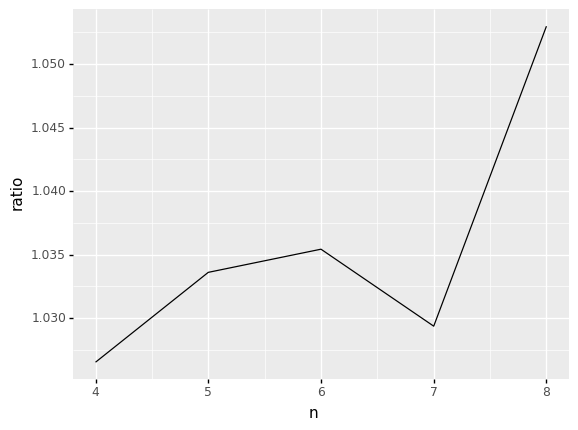

<ggplot: (8768704623830)>

In [28]:
df_cost = df_ratio[['n', 'h', 'total_cost_mean']]
df_cost = df_cost.pivot_table(index=['n'], columns='h', values='total_cost_mean')
df_cost = df_cost.reset_index()
df_cost['ratio'] = df_cost['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_cost, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
)

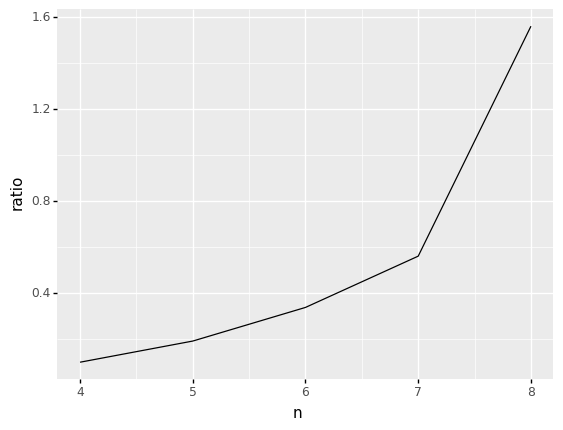

<ggplot: (8768704566312)>

In [29]:
df_count = df_ratio[['n', 'h', 'node_count_mean']]
df_count = df_count.pivot_table(index=['n'], columns='h', values='node_count_mean')
df_count = df_count.reset_index()
df_count['ratio'] = df_count['mst'] / df_cost['smallest_edge']
(
    p9.ggplot(df_count, p9.aes(x='n', y='ratio'))
        + p9.geom_line()
)

In [30]:
#perform difference caluclations
df_diff = df.copy()

df_diff = pd.melt(df_diff, id_vars=['n', 'h', 'test_num'], 
                  value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                  var_name='stat_type', value_name='stat_value')

df_mst_diff = df_mst.copy()

df_mst_diff = pd.melt(df_mst_diff, id_vars=['n', 'h', 'test_num'], 
                      value_vars=['total_cost', 'node_count', 'cpu_time', 'real_time'], 
                      var_name='stat_type', value_name='stat_value')

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num', 'stat_type'], 
                        right_on=['n', 'test_num', 'stat_type'])

df_diff['diff'] = df_diff['stat_value_x'] - df_diff['stat_value_y']
df_diff = df_diff[['n', 'test_num', 'h_x', 'stat_type', 'diff']]
df_diff = df_diff.rename(columns={'h_x': 'h'})

df_diff = df_diff.pivot_table(index=['n', 'test_num', 'h'], columns='stat_type', values='diff')
df_diff = df_diff.reset_index()
del df_diff['test_num']
df_diff_summary = df_diff.groupby(['n', 'h']).agg(['mean', 'min', 'max'])
df_diff_summary

cpu_time                       node_count                  \
                     mean       min       max         mean     min     max   
n h                                                                          
4 random_edge   -0.000175 -0.000373  0.000022     1.300000   -10.0    14.0   
  smallest_edge -0.000059 -0.000188  0.000104     6.133333     1.0    14.0   
  uniform_cost  -0.000116 -0.000305  0.000117     6.200000    -2.0    16.0   
5 random_edge   -0.000649 -0.001326 -0.000176    -7.700000   -36.0    20.0   
  smallest_edge  0.000127 -0.000490  0.000727    24.800000     5.0    53.0   
  uniform_cost  -0.000253 -0.000784  0.000244    34.100000     7.0    89.0   
6 random_edge   -0.002256 -0.004795 -0.000366   -27.466667   -79.0    20.0   
  smallest_edge  0.001914 -0.000644  0.004804   109.200000    18.0   254.0   
  uniform_cost   0.002045 -0.002595  0.050003   170.900000   -12.0   510.0   
7 random_edge   -0.006440 -0.015193 -0.001854   -72.000000  -233.0    10.0   
  smallest_edge  0.009200 -0.001212  0.018730   298.866667    40.0   626.0   
  uniform_cost   0.007765 -0.002497  0.068200   628.366667   154.0  1631.0   
8 random_edge   -0.022610 -0.125199 -0.005993  -211.033333 -1187.0   -14.0   
  smallest_edge  0.038091 -0.002366  0.171047   835.900000    79.0  2855.0   
  uniform_cost   0.024722 -0.038670  0.107695  1616.766667   133.0  5079.0   

                real_time                     total_cost               
                     mean       min       max       mean   min    max  
n h                                                                    
4 random_edge   -0.000175 -0.000388  0.000022   6.633333 -53.0   73.0  
  smallest_edge -0.000059 -0.000202  0.000099  -3.666667 -52.0    0.0  
  uniform_cost  -0.000118 -0.000320  0.000119  -7.566667 -53.0    0.0  
5 random_edge   -0.000653 -0.001331 -0.000180   2.966667  -3.0   40.0  
  smallest_edge  0.000124 -0.000494  0.000725  -4.633333 -53.0    0.0  
  uniform_cost  -0.000255 -0.000804  0.000247  -8.766667 -53.0    0.0  
6 random_edge   -0.002265 -0.004805 -0.000367  13.333333 -33.0   88.0  
  smallest_edge  0.001911 -0.000645  0.004811  -5.933333 -70.0   20.0  
  uniform_cost   0.002042 -0.002594  0.050073 -13.666667 -70.0    0.0  
7 random_edge   -0.006465 -0.015216 -0.001872  24.933333 -27.0  135.0  
  smallest_edge  0.009216 -0.001262  0.018754  -5.266667 -34.0    0.0  
  uniform_cost   0.007771 -0.002535  0.068398 -11.066667 -45.0    0.0  
8 random_edge   -0.022701 -0.125747 -0.006004  34.600000 -29.0  108.0  
  smallest_edge  0.038135 -0.002774  0.171281  -8.600000 -52.0   11.0  
  uniform_cost   0.024783 -0.038971  0.108021 -15.133333 -52.0    0.0

The above is a table of the mean/min/max of the differences between each catagory in the original test and the values of the mst test

In [31]:
# prepping plot dataframe
df_plot = df_diff.groupby(['n', 'h']).agg(['mean'])
df_plot.columns = [
    'total_cost_mean', 
    'node_count_mean',
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

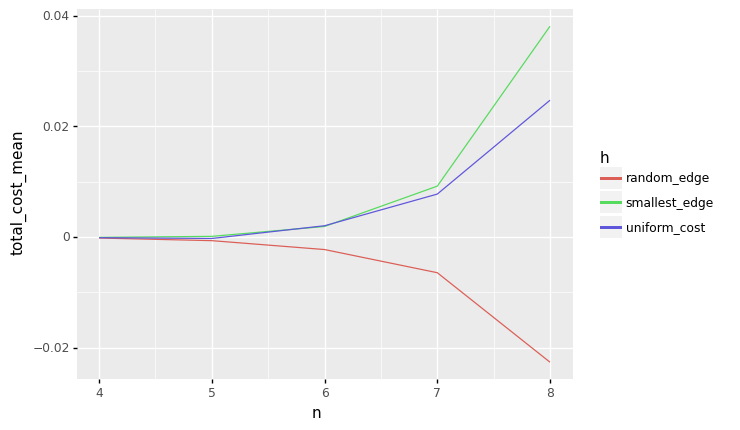

<ggplot: (8768704627306)>

In [32]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='h'))
        + p9.geom_line()
)

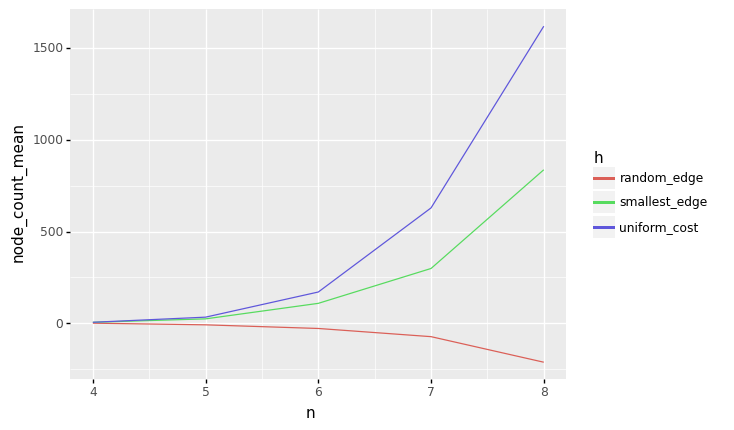

<ggplot: (8768704637808)>

In [33]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='node_count_mean', color='h'))
        + p9.geom_line()
)

## Part 3: Explore Local Search Algorithm

In [34]:
def test_local_search_alg(families, funcs):
    df = pd.DataFrame(columns=['n', 'search_type', 'total_cost', 'cpu_time', 'real_time'])

    for graph_size, family in families:
        for func_name, func in funcs.items():
            for i, graph in enumerate(family):
                start_cpu_time = time.process_time()
                start_real_time = time.perf_counter()

                search_result = func(graph)

                end_cpu_time = time.process_time()
                end_real_time = time.perf_counter()
                
                df = df.append({
                    'n': graph_size,
                    'search_type': func_name,
                    'test_num': i,
                    'total_cost': tsp.path_cost(search_result, graph),
                    'cpu_time': end_cpu_time - start_cpu_time,
                    'real_time': end_real_time - start_real_time
                }, ignore_index=True)
    
    df = df.astype({'total_cost': 'int64'})
    return df

In [35]:
families = [
    (4, gen_graphs(4)),
    (5, gen_graphs(5)),
    (6, gen_graphs(6)),
    (7, gen_graphs(7)),
    (8, gen_graphs(8)),
    
#     (5, gen_graphs(5)),
#     (10, gen_graphs(10)),
#     (15, gen_graphs(15)),
#     (20, gen_graphs(20)),
]

In [36]:
# contants for algorithms

hill_climbing_restarts = 100

simulated_annealing_iterations = 100
simulated_annealing_cooling_factor = 0.96

genetic_alg_iterations = 250
genetic_alg_population_size = 250
genetic_alg_mutation_factor = 0.5

In [37]:
funcs = {
    'hill_climbing': lambda g: ls.hillClimbing(g, hill_climbing_restarts),
    'simulated_annealing': lambda g: ls.simuAnnealing(g, simulated_annealing_iterations, simulated_annealing_cooling_factor),
    'genetic_algorithm': lambda g: ls.genetic(g, genetic_alg_iterations, genetic_alg_population_size, genetic_alg_mutation_factor)
}

In [51]:
df = test_local_search_alg(families, funcs)
df_mst = test_a_star(families, { 'mst': a_star.h_mst })
del df_mst['node_count']
df_mst = df_mst.rename(columns={'h': 'search_type'})
df_comb = df.append(df_mst, ignore_index=True)

df_summary = df_comb.copy();
del df_summary['test_num']
df_summary.groupby(['n', 'search_type']).agg(['mean', 'max', 'min'])

total_cost            cpu_time                      \
                             mean  max  min      mean       max       min   
n search_type                                                               
4 genetic_algorithm    177.433333  260  104  0.236622  0.245166  0.232233   
  hill_climbing        177.433333  260  104  0.001565  0.002311  0.001465   
  mst                  155.766667  257   14  0.000409  0.000644  0.000194   
  simulated_annealing  177.433333  260  104  0.000911  0.000930  0.000889   
5 genetic_algorithm    191.800000  356   86  0.258447  0.269358  0.255616   
  hill_climbing        191.800000  356   86  0.002016  0.002194  0.001933   
  mst                  181.166667  356   86  0.001203  0.002091  0.000556   
  simulated_annealing  191.800000  356   86  0.000985  0.001056  0.000950   
6 genetic_algorithm    187.466667  311  121  0.278317  0.281978  0.276102   
  hill_climbing        190.033333  311  121  0.002497  0.002626  0.002399   
  mst                  171.733333  311   56  0.003000  0.007238  0.001392   
  simulated_annealing  191.600000  311  121  0.001032  0.001073  0.001003   
7 genetic_algorithm    222.833333  315  114  0.295135  0.303556  0.292383   
  hill_climbing        230.066667  330   85  0.003030  0.003183  0.002925   
  mst                  189.166667  292   85  0.008063  0.016531  0.001923   
  simulated_annealing  213.433333  313   85  0.001086  0.001263  0.001037   
8 genetic_algorithm    242.000000  320  152  0.318828  0.322556  0.316880   
  hill_climbing        253.333333  328  141  0.003654  0.003804  0.003548   
  mst                  196.700000  308   82  0.022550  0.062378  0.007235   
  simulated_annealing  222.466667  330  124  0.001168  0.001307  0.001107   

                      real_time                      
                           mean       max       min  
n search_type                                        
4 genetic_algorithm    0.236905  0.245660  0.232488  
  hill_climbing        0.001561  0.002294  0.001468  
  mst                  0.000409  0.000643  0.000193  
  simulated_annealing  0.000911  0.000934  0.000891  
5 genetic_algorithm    0.258904  0.269845  0.256050  
  hill_climbing        0.002019  0.002197  0.001933  
  mst                  0.001203  0.002091  0.000556  
  simulated_annealing  0.000985  0.001056  0.000949  
6 genetic_algorithm    0.279002  0.282520  0.276841  
  hill_climbing        0.002504  0.002626  0.002403  
  mst                  0.003004  0.007248  0.001391  
  simulated_annealing  0.001032  0.001072  0.001005  
7 genetic_algorithm    0.295581  0.304234  0.292751  
  hill_climbing        0.003038  0.003188  0.002924  
  mst                  0.008075  0.016555  0.001927  
  simulated_annealing  0.001088  0.001267  0.001036  
8 genetic_algorithm    0.319267  0.323033  0.317354  
  hill_climbing        0.003659  0.003809  0.003551  
  mst                  0.022584  0.062475  0.007244  
  simulated_annealing  0.001171  0.001312  0.001112

In [52]:
df_plot = df_comb.copy()
del df_plot['test_num']
df_plot = df_plot.groupby(['n', 'search_type']).agg(['mean'])
df_plot.columns = [
    'total_cost_mean', 
    'cpu_time_mean',
    'real_time_mean',
]
df_plot = df_plot.reset_index()

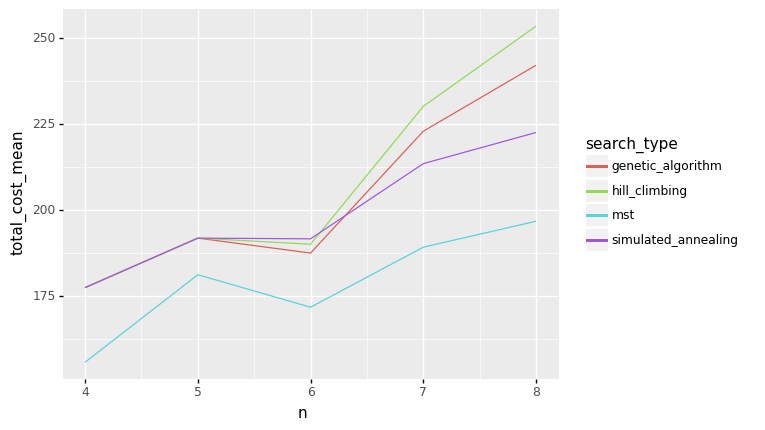

<ggplot: (8768704337433)>

In [53]:
(
    p9.ggplot(df_plot, p9.aes(x='n', y='total_cost_mean', color='search_type'))
        + p9.geom_line()
)

In [77]:
#perform difference caluclations
df_diff = df.copy()
df_diff = df_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_mst_diff = df_mst.copy()
df_mst_diff = df_mst_diff[['n', 'test_num', 'search_type', 'total_cost', 'cpu_time']]

df_diff = df_diff.merge(df_mst_diff, how='left', 
                        left_on=['n', 'test_num'], 
                        right_on=['n', 'test_num'])

df_diff['diff'] = df_diff['total_cost_x'] - df_diff['total_cost_y']
df_diff = df_diff[['n', 'search_type_x', 'diff', 'cpu_time_x']]
df_diff = df_diff.rename(columns={'search_type_x': 'search_type', 'cpu_time_x': 'cpu_time'})

df_diff_summary = df_diff.groupby(['n', 'search_type']).agg(['mean', 'min', 'max'])
df_diff_summary

diff           cpu_time                    
                            mean min  max      mean       min       max
n search_type                                                          
4 genetic_algorithm    21.666667 -13  128  0.236622  0.232233  0.245166
  hill_climbing        21.666667 -13  128  0.001565  0.001465  0.002311
  simulated_annealing  21.666667 -13  128  0.000911  0.000889  0.000930
5 genetic_algorithm    10.633333   0   78  0.258447  0.255616  0.269358
  hill_climbing        10.633333   0   78  0.002016  0.001933  0.002194
  simulated_annealing  10.633333   0   78  0.000985  0.000950  0.001056
6 genetic_algorithm    15.733333  -6  107  0.278317  0.276102  0.281978
  hill_climbing        18.300000  -6  107  0.002497  0.002399  0.002626
  simulated_annealing  19.866667  -6  110  0.001032  0.001003  0.001073
7 genetic_algorithm    33.666667  -6  140  0.295135  0.292383  0.303556
  hill_climbing        40.900000   0  133  0.003030  0.002925  0.003183
  simulated_annealing  24.266667 -12  124  0.001086  0.001037  0.001263
8 genetic_algorithm    45.300000   0  132  0.318828  0.316880  0.322556
  hill_climbing        56.633333  12  142  0.003654  0.003548  0.003804
  simulated_annealing  25.766667  -7  106  0.001168  0.001107  0.001307

In [78]:
df_diff_summary.columns = ['diff_mean', 'diff_min', 'diff_max', 'cpu_time_mean', 'cpu_time_min', 'cpu_time_max']
df_diff_summary = df_diff_summary.reset_index()
df_diff_summary = df_diff_summary.drop(['cpu_time_min', 'cpu_time_max'], axis=1)
df_diff_summary = pd.melt(df_diff_summary, id_vars=['n', 'search_type', 'cpu_time_mean'], 
                  value_vars=['diff_mean', 'diff_min', 'diff_max'], 
                  var_name='diff_type', value_name='diff_value')

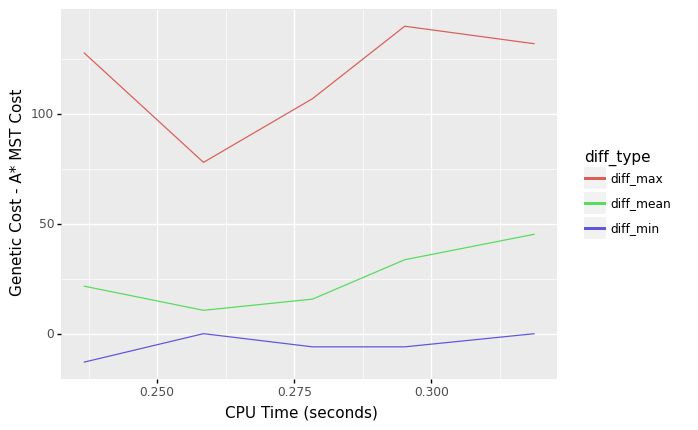

<ggplot: (8768704655418)>

In [85]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'genetic_algorithm'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Genetic Cost - A* MST Cost')
)

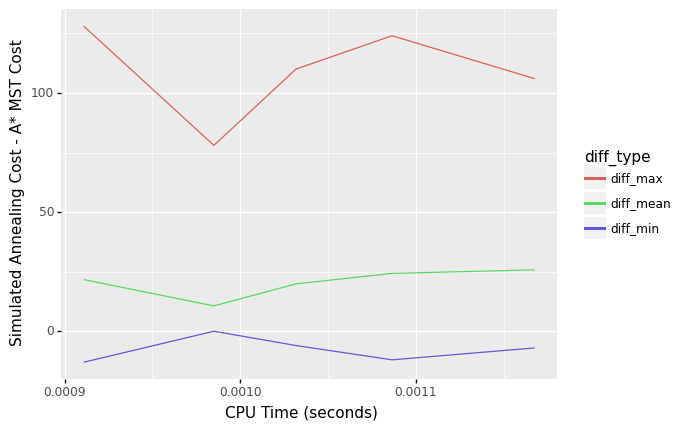

<ggplot: (8768704360497)>

In [86]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'simulated_annealing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Simulated Annealing Cost - A* MST Cost')
)

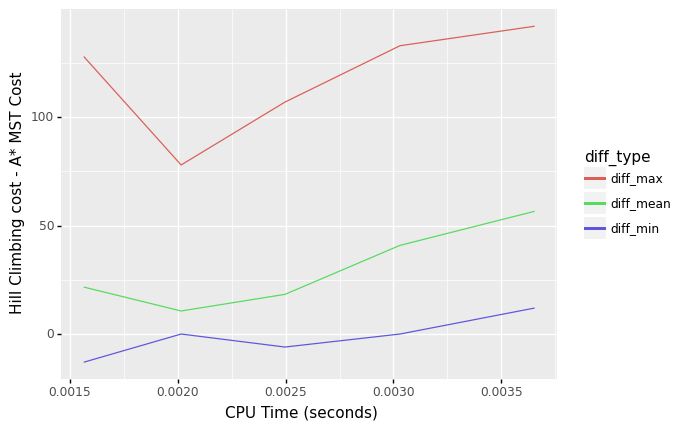

<ggplot: (8768702135164)>

In [87]:
(
    p9.ggplot(df_diff_summary[df_diff_summary['search_type'] == 'hill_climbing'], 
              p9.aes(x='cpu_time_mean', y='diff_value', color='diff_type'))
        + p9.geom_line()
        + p9.labs(x='CPU Time (seconds)', y='Hill Climbing cost - A* MST Cost')
)